# Exploratory Data Analysis

## Import Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import math



### Load Data

In [2]:
# Melakukan import csv
df = pd.read_csv("Nvidia_stock_data.csv")
df.sample(5)

,Date,Close,High,Low,Open,Volume
6627,2025-05-28,134.809998,137.250000,134.789993,136.029999,304021100
1400,2004-08-18,0.089408,0.089408,0.083523,0.084211,872424000
5474,2020-10-22,13.322017,13.572035,13.193143,13.483045,290480000
3586,2013-04-25,0.312699,0.313395,0.308985,0.311770,353224000
3960,2014-10-17,0.416300,0.426815,0.414627,0.422036,290716000


### Descriptive Statictics




In [3]:
# Mengecek apakah ada data yang NaN/Null
print(df.isnull().values.any())
print(df.isna().sum())

False
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [4]:
# Mengecek Duplicated data
df.duplicated().sum()


np.int64(0)

In [5]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")


The Number of Rows are 6637, and columns are 6.


In [6]:
# Mengecek Datatype tiap kolom berserta non-null kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6637 non-null   object 
 1   Close   6637 non-null   float64
 2   High    6637 non-null   float64
 3   Low     6637 non-null   float64
 4   Open    6637 non-null   float64
 5   Volume  6637 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.2+ KB


 bisa dilihat tipe data date masih object, maka harus diganti dengan date time

***Observation***

1. Jumlah barisnya 6637, dan jumlah kolomnya 6.
2. Tidak ada missing value
3. Perlu diubah tipe data dari Date yang tadinya object kita harus ubah ke datetime

### Data Prepocessing

#### Convert 'Date' to datetime and sort


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6637 non-null   datetime64[ns]
 1   Close   6637 non-null   float64       
 2   High    6637 non-null   float64       
 3   Low     6637 non-null   float64       
 4   Open    6637 non-null   float64       
 5   Volume  6637 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 311.2 KB


In [9]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,6637,6637.000000,6637.000000,6637.000000,6637.000000,6.637000e+03
mean,2012-03-30 16:38:28.512882176,10.091263,10.279293,9.885371,10.091765,5.952182e+08
min,1999-01-22 00:00:00,0.031283,0.032597,0.030566,0.032000,1.968000e+07
25%,2005-08-26 00:00:00,0.259741,0.266981,0.251946,0.259053,3.333360e+08
50%,2012-03-29 00:00:00,0.440848,0.447144,0.434353,0.440676,4.961320e+08
75%,2018-10-31 00:00:00,4.888134,4.957336,4.810735,4.895365,7.269720e+08
max,2025-06-10 00:00:00,149.416245,153.115916,147.806407,153.015919,9.230856e+09
std,NaN,26.686641,27.192558,26.140134,26.706411,4.297521e+08


In [10]:
data_array = df

nilai_maksimum_np = data_array.max()
nilai_minimum_np = data_array.min()

print(f"Nilai maksimum (NumPy): {nilai_maksimum_np}")
print(f"Nilai minimum (NumPy): {nilai_minimum_np}")

Nilai maksimum (NumPy): Date      2025-06-10 00:00:00
Close              149.416245
High               153.115916
Low                147.806407
Open               153.015919
Volume             9230856000
dtype: object
Nilai minimum (NumPy): Date      1999-01-22 00:00:00
Close                0.031283
High                 0.032597
Low                  0.030566
Open                    0.032
Volume               19680000
dtype: object


# Visualizations

### 1. Line Chart of Closing Price Over Time


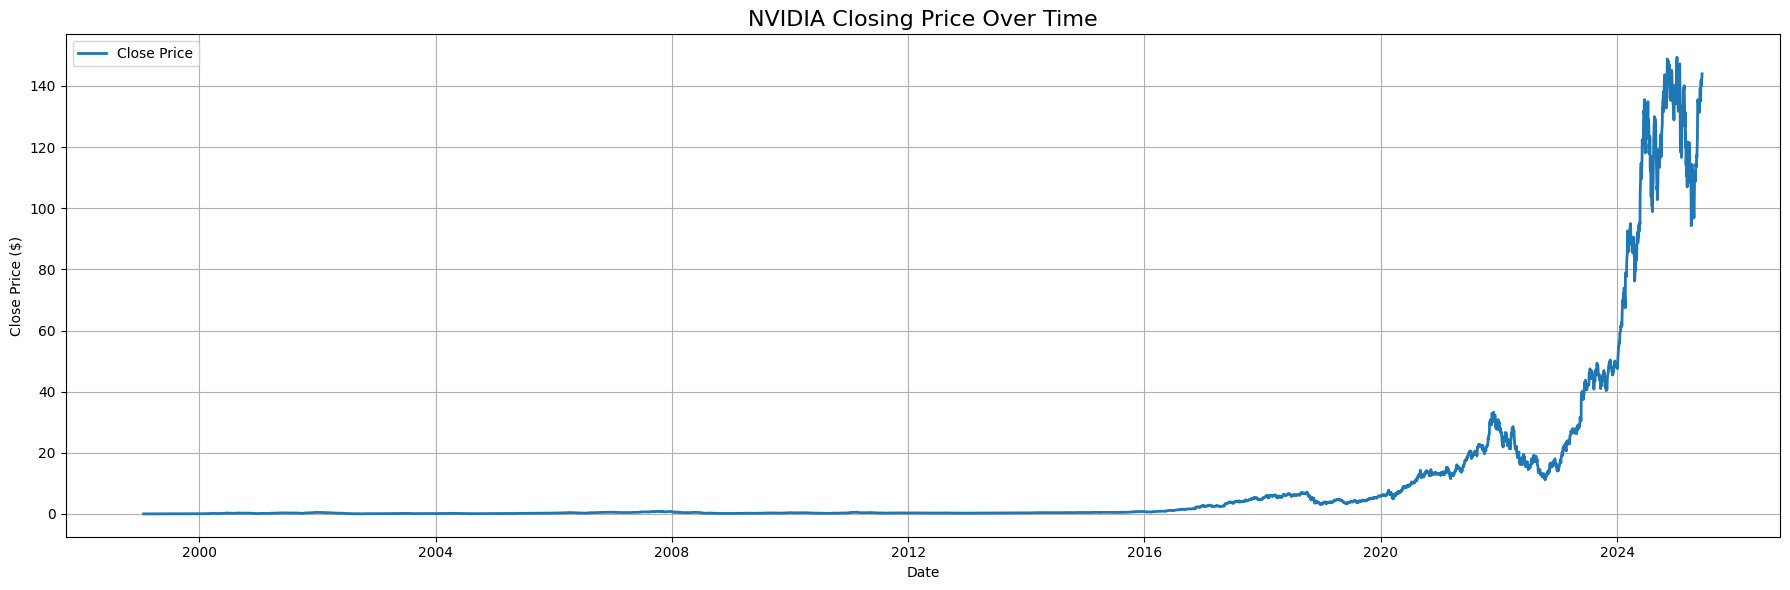

In [11]:
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], df['Close'], label="Close Price", linewidth=2)
plt.title("NVIDIA Closing Price Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Volume vs Closing Price

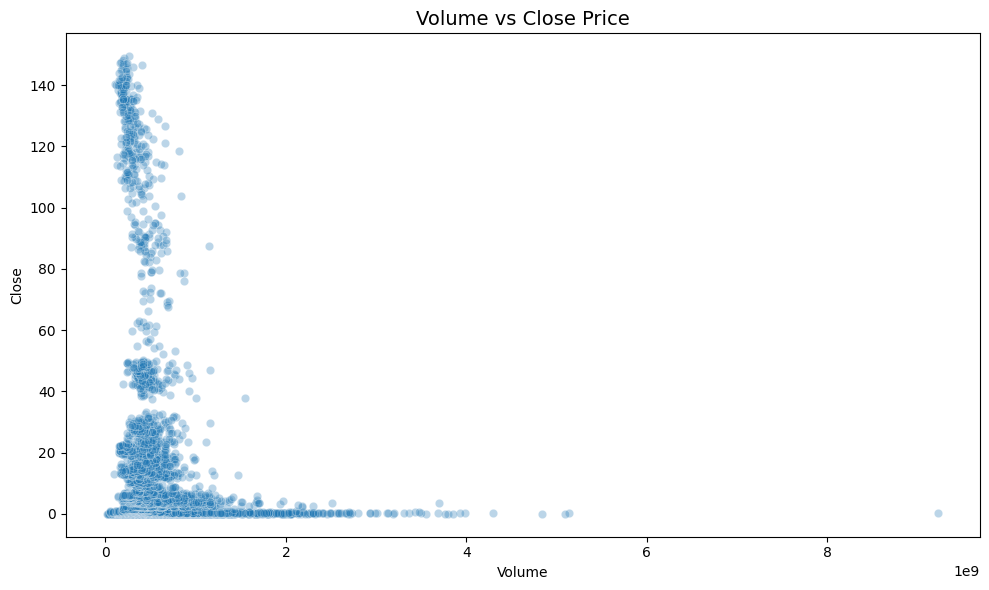

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.3)
plt.title("Volume vs Close Price", fontsize=14)
plt.tight_layout()
plt.show()

3. Correlation Heatmap

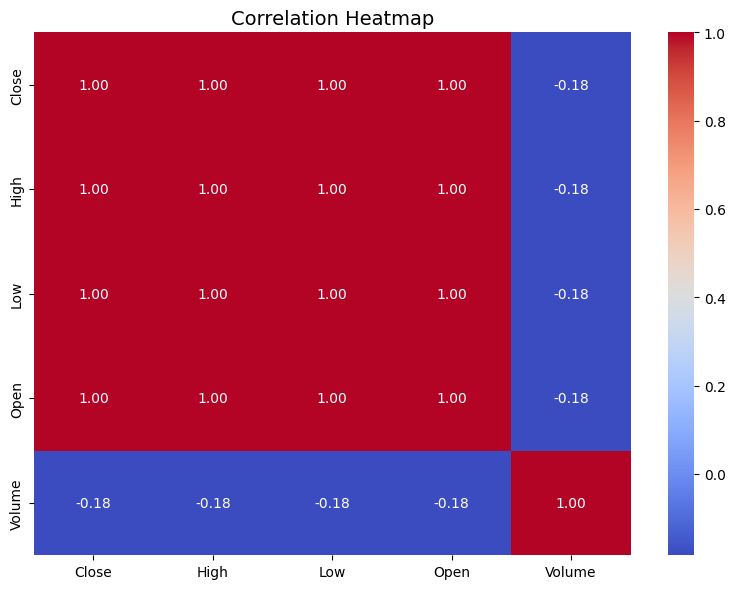

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Date']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

4. Line Plot

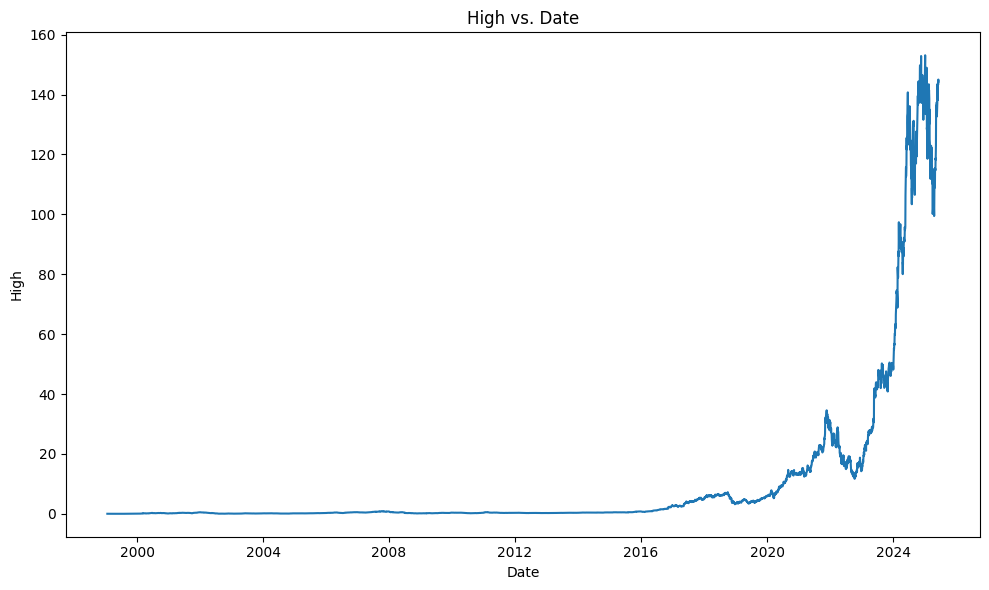

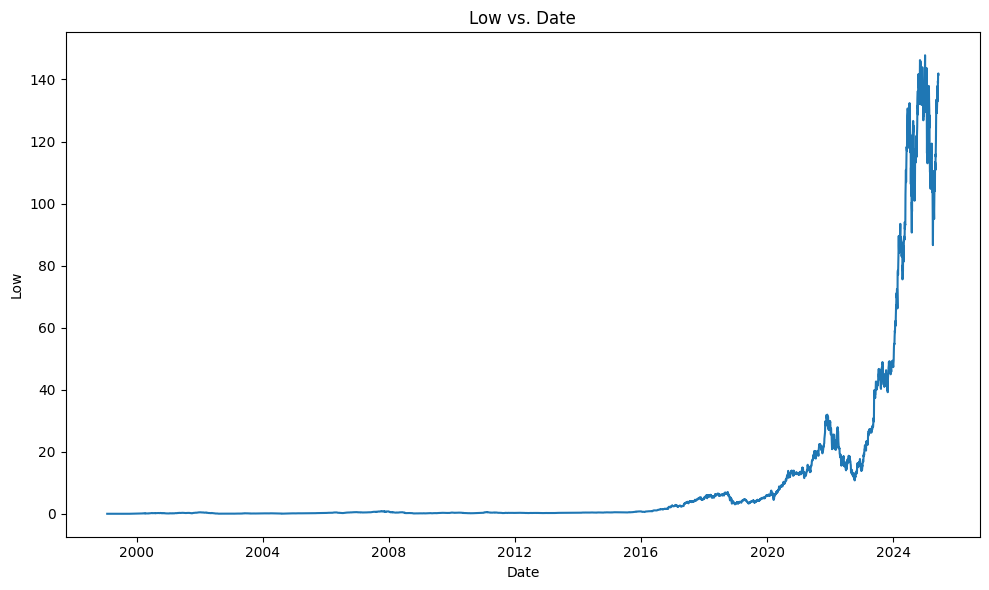

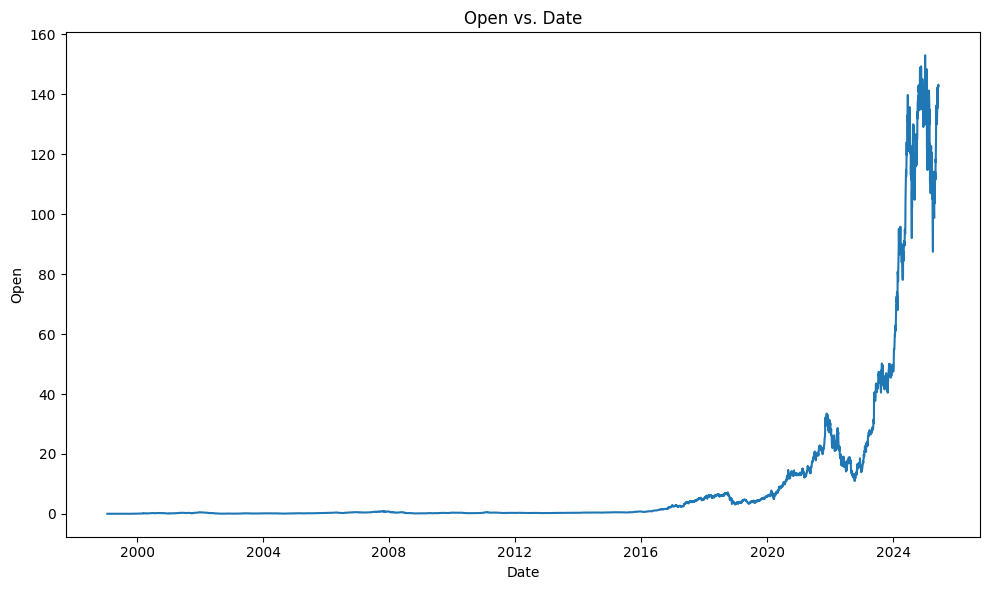

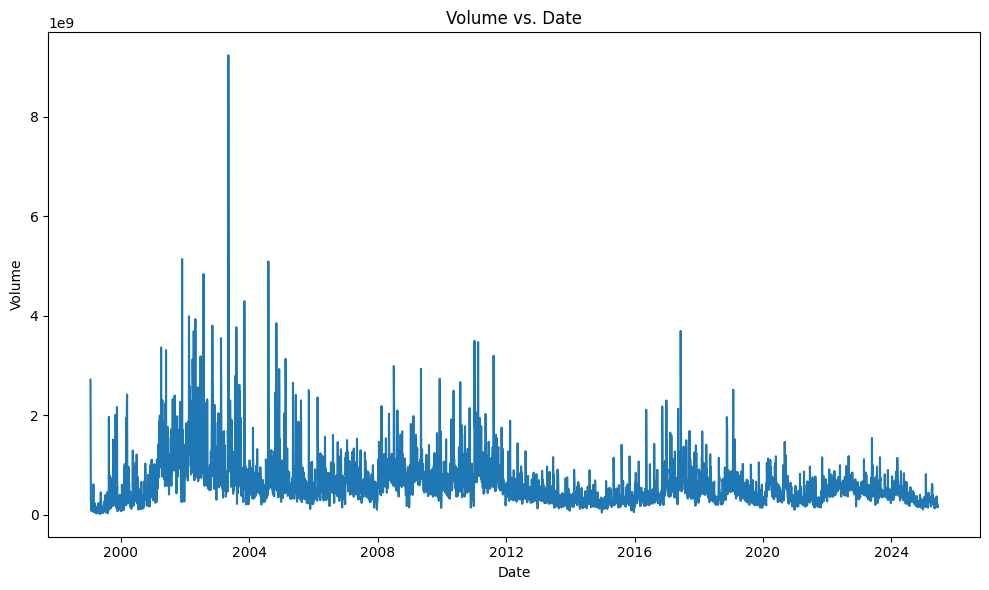

In [14]:
for column in df.columns[2:]:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} vs. Date')
    plt.tight_layout()
    plt.show()

# Model Fitting


## LSTM

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from math import ceil


In [16]:
early_stop = EarlyStopping(
    monitor='val_loss',      # pantau val_loss
    patience=10,             # berhenti kalau 10 epoch berturut-turut tidak membaik
    restore_best_weights=True # balikin bobot terbaik
)

In [17]:
shape = df.shape[0]
df_new=df[['Open']]
dataset = df_new.values
train = df_new.iloc[:ceil(shape * 0.9)]
valid = df_new.iloc[ceil(shape * 0.9):]
print('-----------------------------------------------------------------------------')
print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
print('-----------------------------------------------------------------------------')
print('Shape of Training Set',train.shape)
print('Shape of Validation Set',valid.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_new)
x_train, y_train = [], []
for i in range(40,len(train)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    verbose=2,
    validation_split=0.1,
    callbacks=[early_stop])

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (5974, 1)
Shape of Validation Set (663, 1)
Epoch 1/50
167/167 - 27s - 159ms/step - loss: 8.6821e-06 - val_loss: 1.0094e-04
Epoch 2/50
167/167 - 8s - 46ms/step - loss: 1.4050e-06 - val_loss: 1.0010e-04
Epoch 3/50
167/167 - 8s - 48ms/step - loss: 1.2895e-06 - val_loss: 1.0691e-04
Epoch 4/50
167/167 - 8s - 48ms/step - loss: 9.4101e-07 - val_loss: 7.4602e-05
Epoch 5/50
167/167 - 7s - 41ms/step - loss: 1.2526e-06 - val_loss: 6.6443e-05
Epoch 6/50
167/167 - 8s - 49ms/step - loss: 1.0019e-06 - val_loss: 6.1204e-05
Epoch 7/50
167/167 - 7s - 42ms/step - loss: 8.0176e-07 - val_loss: 5.8701e-05
Epoch 8/50
167/167 - 10s - 61ms/step - loss: 1.0492e-06 - val_loss: 6.0481e-05
Epoch 9/50
167/167 - 8s - 51ms/step - loss: 9.4249e-07 - val_loss: 5.1399e

In [18]:
inputs = df_new[len(df_new) - len(valid) - 40:]
inputs
inputs.values.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(40,inputs.shape[0]):
    X_test.append(inputs[i-40:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
opening_price = model.predict(X_test)
opening_price= scaler.inverse_transform(opening_price)
rms=np.sqrt(np.mean(np.power((valid-opening_price),2)))
print('RMSE value on validation set:',rms)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
RMSE value on validation set: 3.487077497568773


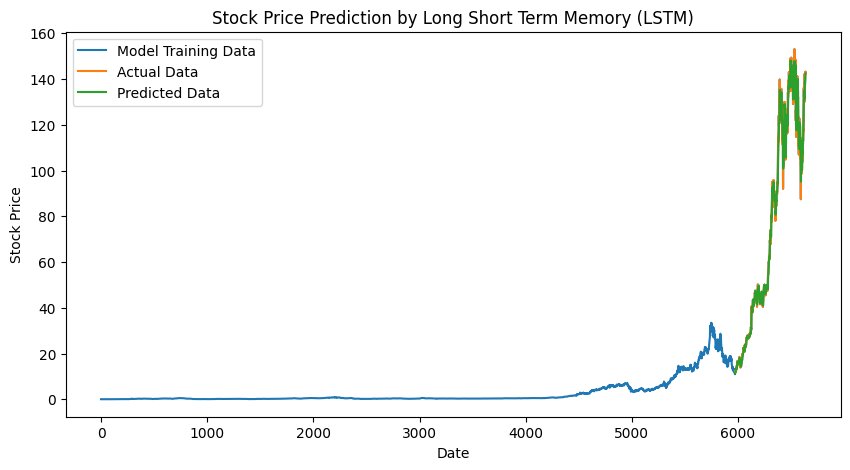

In [19]:
# Visualize the prediction
plt.figure(figsize=(10,5), dpi=100)
valid['Predictions'] = opening_price
plt.plot(df_new['Open'])
plt.plot(valid[['Open','Predictions']])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)')
plt.legend(['Model Training Data','Actual Data','Predicted Data'])

## Prophet

In [20]:
pip install prophet

In [21]:
from prophet import Prophet

In [22]:
def prophet_prediction(df):
    shape=df.shape[0]
    df_new = df[['Date', 'Close']].copy()
    df_new.reset_index(inplace=True)
    df_new['Date'] = pd.to_datetime(df_new.Date,format='%Y-%m-%d')
    df_new.index = df_new['Date']
    df_new.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY PROPHET-----------')
    print('-------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    model = Prophet()
    model.fit(train_set)
    close_prices = model.make_future_dataframe(periods=len(valid_set))
    forecast = model.predict(close_prices)
    forecast_valid = forecast['yhat'][ceil(shape*0.75):]
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['y'])-np.array(forecast_valid)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = forecast_valid.values
    plt.plot(train_set['y'])
    plt.plot(valid_set[['y', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Prophet',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-------------------------------------------------------
-----------STOCK PRICE PREDICTION BY PROPHET-----------
-------------------------------------------------------
Shape of Training Set (4978, 3)
Shape of Validation Set (1659, 3)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8cv5_xp_/kxr_wgv3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8cv5_xp_/gelcn7mr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1479', 'data', 'file=/tmp/tmp8cv5_xp_/kxr_wgv3.json', 'init=/tmp/tmp8cv5_xp_/gelcn7mr.json', 'output', 'file=/tmp/tmp8cv5_xp_/prophet_model266x9htm/prophet_model-20250908143817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE value on validation set: 49.340432668353
-----------------------------------------------------------
-----------------------------------------------------------


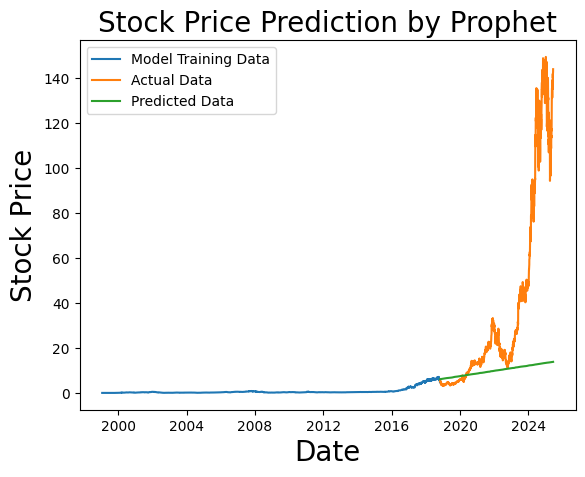

In [23]:
prophet_prediction(df)


## EXPONENTIAL SMOOTHING





In [24]:
def exp_smoothing_prediction(df):
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    import warnings
    from contextlib import redirect_stdout
    import os

    shape = df.shape[0]
    df_new = df[['Date', 'Close']].copy()
    df_new.reset_index(inplace=True)
    df_new['Date'] = pd.to_datetime(df_new.Date, format='%Y-%m-%d')
    df_new.index = df_new['Date']
    df_new.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY EXPONENTIAL SMOOTHING-----------')
    print('-------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)

    # Model Exponential Smoothing (sembunyikan output)
    model = ExponentialSmoothing(train_set['y'], trend='add', seasonal=None, damped_trend=True)
    warnings.filterwarnings('ignore')
    with redirect_stdout(open(os.devnull, 'w')):
        fitted_model = model.fit()

    # Forecast
    forecast = fitted_model.forecast(steps=len(valid_set))
    forecast_valid = forecast

    rms = np.sqrt(np.mean(np.power((np.array(valid_set['y']) - np.array(forecast_valid)), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = forecast_valid.values
    plt.plot(train_set['y'])
    plt.plot(valid_set[['y', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Exponential Smoothing', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

-------------------------------------------------------
-----------STOCK PRICE PREDICTION BY EXPONENTIAL SMOOTHING-----------
-------------------------------------------------------
Shape of Training Set (4978, 3)
Shape of Validation Set (1659, 3)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE value on validation set: 53.9157694016991
-----------------------------------------------------------
-----------------------------------------------------------


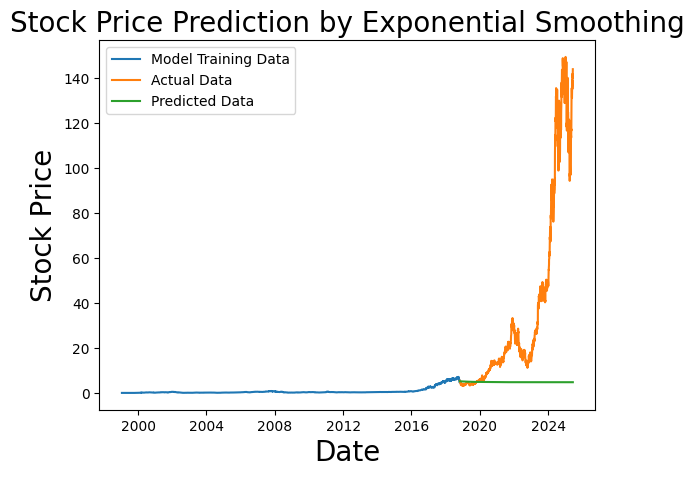

In [25]:
exp_smoothing_prediction(df)
